# Dataset Preprocessing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

# Define the file path
file_path = '/content/drive/MyDrive/semester_4/intro_to_embedded_DL/Project/wunderground.csv'

# Try to load the CSV file
try:
    df = pd.read_csv(file_path)
    print("CSV file loaded successfully!")

    # Define the columns you need
    columns_to_keep = ['Date', 'Time', 'Temperature', 'Humidity', 'Pressure', 'Condition']

    # Check if required columns exist
    if all(column in df.columns for column in columns_to_keep):
        df = df[columns_to_keep]
        print("Filtered DataFrame:")
        print(df.head())
    else:
        missing_columns = [col for col in columns_to_keep if col not in df.columns]
        print(f"Error: The following columns are missing from the CSV: {missing_columns}")
except pd.errors.EmptyDataError:
    print(f"Error: The file '{file_path}' is empty.")
except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found.")
except Exception as e:
    print(f"An error occurred: {e}")


CSV file loaded successfully!
Filtered DataFrame:
         Date      Time Temperature Humidity  Pressure Condition
0  2014-12-13  12:51 AM        28°F     88°%  28.88°in    Cloudy
1  2014-12-13   1:51 AM        28°F     88°%  28.89°in    Cloudy
2  2014-12-13   2:39 AM        28°F     92°%  28.89°in       Fog
3  2014-12-13   2:51 AM        28°F     92°%  28.89°in       Fog
4  2014-12-13   3:22 AM        28°F     92°%  28.89°in       Fog


In [ ]:
from datetime import datetime

try:

    df['Datetime'] = pd.to_datetime(
        df['Date'] + ' ' + df['Time'],
        format='%Y-%m-%d %I:%M %p',  # Adjust this if your data format is different
        errors='coerce'
    )

    # Remove rows with invalid datetime values
    if df['Datetime'].isnull().any():
        print("Warning: Invalid Date or Time entries found. These rows will be removed.")
        df = df.dropna(subset=['Datetime'])

    # Check if the DataFrame is sorted chronologically
    if df['Datetime'].is_monotonic_increasing:
        print("The data is already in chronological order.")
    else:
        print("The data is NOT in chronological order. Sorting now...")
        df = df.sort_values(by='Datetime').reset_index(drop=True)
        print("DataFrame sorted by datetime:")
        print(df.head())
except KeyError:
    print("Error: The required 'Date' and/or 'Time' columns are missing.")
except Exception as e:
    print(f"An error occurred: {e}")


The data is NOT in chronological order. Sorting now...
DataFrame sorted by datetime:
         Date      Time Temperature Humidity  Pressure Condition  \
0  2014-12-13  12:51 AM        28°F     88°%  28.88°in    Cloudy   
1  2014-12-13   1:51 AM        28°F     88°%  28.89°in    Cloudy   
2  2014-12-13   2:39 AM        28°F     92°%  28.89°in       Fog   
3  2014-12-13   2:51 AM        28°F     92°%  28.89°in       Fog   
4  2014-12-13   3:22 AM        28°F     92°%  28.89°in       Fog   

             Datetime  
0 2014-12-13 00:51:00  
1 2014-12-13 01:51:00  
2 2014-12-13 02:39:00  
3 2014-12-13 02:51:00  
4 2014-12-13 03:22:00  


In [ ]:
df.head(20)


,Date,Time,Temperature,Humidity,Pressure,Condition,Datetime
0,2014-12-13,12:51 AM,28°F,88°%,28.88°in,Cloudy,2014-12-13 00:51:00
1,2014-12-13,1:51 AM,28°F,88°%,28.89°in,Cloudy,2014-12-13 01:51:00
2,2014-12-13,2:39 AM,28°F,92°%,28.89°in,Fog,2014-12-13 02:39:00
3,2014-12-13,2:51 AM,28°F,92°%,28.89°in,Fog,2014-12-13 02:51:00
4,2014-12-13,3:22 AM,28°F,92°%,28.89°in,Fog,2014-12-13 03:22:00
5,2014-12-13,3:51 AM,28°F,96°%,28.89°in,Fog,2014-12-13 03:51:00
6,2014-12-13,4:33 AM,28°F,96°%,28.88°in,Fog,2014-12-13 04:33:00
7,2014-12-13,4:51 AM,28°F,96°%,28.88°in,Fog,2014-12-13 04:51:00
8,2014-12-13,5:29 AM,28°F,92°%,28.87°in,Light Freezing Drizzle,2014-12-13 05:29:00
9,2014-12-13,5:44 AM,28°F,92°%,28.87°in,Fog,2014-12-13 05:44:00


In [ ]:
df.tail(20)

,Date,Time,Temperature,Humidity,Pressure,Condition,Datetime
98061,2024-12-09,9:13 AM,52°F,86°%,28.50°in,Light Rain,2024-12-09 09:13:00
98062,2024-12-09,9:51 AM,52°F,86°%,28.50°in,Light Rain,2024-12-09 09:51:00
98063,2024-12-09,10:51 AM,53°F,86°%,28.51°in,Light Rain,2024-12-09 10:51:00
98064,2024-12-09,11:51 AM,54°F,83°%,28.49°in,Cloudy,2024-12-09 11:51:00
98065,2024-12-09,12:51 PM,54°F,83°%,28.49°in,Light Drizzle,2024-12-09 12:51:00
98066,2024-12-09,1:02 PM,54°F,83°%,28.49°in,Light Drizzle,2024-12-09 13:02:00
98067,2024-12-09,1:34 PM,54°F,86°%,28.49°in,Light Drizzle,2024-12-09 13:34:00
98068,2024-12-09,1:51 PM,54°F,86°%,28.50°in,Light Drizzle,2024-12-09 13:51:00
98069,2024-12-09,2:14 PM,55°F,83°%,28.50°in,Cloudy,2024-12-09 14:14:00
98070,2024-12-09,2:51 PM,55°F,83°%,28.51°in,Light Drizzle,2024-12-09 14:51:00


In [ ]:

df.rename(columns={
    'Temperature': 'Temperature (F)',
    'Humidity': 'Humidity (%)',
    'Pressure': 'Pressure (in)'
}, inplace=True)


def clean_column(column, unit_suffix):

    return pd.to_numeric(column.astype(str).str.replace(unit_suffix, '', regex=True), errors='coerce')

df['Temperature (F)'] = clean_column(df['Temperature (F)'], '°F')
df['Humidity (%)'] = clean_column(df['Humidity (%)'], '°%')
df['Pressure (in)'] = clean_column(df['Pressure (in)'], '°in')


print("Cleaned DataFrame:")
print(df.head())



Cleaned DataFrame:
         Date      Time  Temperature (F)  Humidity (%)  Pressure (in)  \
0  2014-12-13  12:51 AM               28            88          28.88   
1  2014-12-13   1:51 AM               28            88          28.89   
2  2014-12-13   2:39 AM               28            92          28.89   
3  2014-12-13   2:51 AM               28            92          28.89   
4  2014-12-13   3:22 AM               28            92          28.89   

  Condition            Datetime  
0    Cloudy 2014-12-13 00:51:00  
1    Cloudy 2014-12-13 01:51:00  
2       Fog 2014-12-13 02:39:00  
3       Fog 2014-12-13 02:51:00  
4       Fog 2014-12-13 03:22:00  


In [ ]:
df = df.drop(columns=['Date', 'Time'])


print("Updated DataFrame with only required columns:")
print(df.head())


Updated DataFrame with only required columns:
   Temperature (F)  Humidity (%)  Pressure (in) Condition            Datetime
0               28            88          28.88    Cloudy 2014-12-13 00:51:00
1               28            88          28.89    Cloudy 2014-12-13 01:51:00
2               28            92          28.89       Fog 2014-12-13 02:39:00
3               28            92          28.89       Fog 2014-12-13 02:51:00
4               28            92          28.89       Fog 2014-12-13 03:22:00


In [ ]:
columns_order = ['Datetime', 'Temperature (F)', 'Humidity (%)', 'Pressure (in)', 'Condition']
df = df[columns_order]

print(df.head())


             Datetime  Temperature (F)  Humidity (%)  Pressure (in) Condition
0 2014-12-13 00:51:00               28            88          28.88    Cloudy
1 2014-12-13 01:51:00               28            88          28.89    Cloudy
2 2014-12-13 02:39:00               28            92          28.89       Fog
3 2014-12-13 02:51:00               28            92          28.89       Fog
4 2014-12-13 03:22:00               28            92          28.89       Fog


In [ ]:
df.shape

(98081, 5)

In [ ]:
# Function to convert Fahrenheit to Celsius
def fahrenheit_to_celsius(fahrenheit):
    return (fahrenheit - 32) * 5.0 / 9.0


df['Temperature (C)'] = fahrenheit_to_celsius(df['Temperature (F)'])

columns_order = ['Datetime', 'Temperature (C)', 'Humidity (%)', 'Pressure (in)', 'Condition']
df = df[columns_order]

print("DataFrame with Fahrenheit to Celsius conversion:")
print(df.head())


DataFrame with Fahrenheit to Celsius conversion:
             Datetime  Temperature (C)  Humidity (%)  Pressure (in) Condition
0 2014-12-13 00:51:00        -2.222222            88          28.88    Cloudy
1 2014-12-13 01:51:00        -2.222222            88          28.89    Cloudy
2 2014-12-13 02:39:00        -2.222222            92          28.89       Fog
3 2014-12-13 02:51:00        -2.222222            92          28.89       Fog
4 2014-12-13 03:22:00        -2.222222            92          28.89       Fog


In [ ]:
# Convert Pressure from inches to hPa
df['Pressure (hPa)'] = df['Pressure (in)'] * 33.863886666667

df = df.drop(columns=['Pressure (in)'])

print("DataFrame with Pressure converted to hPa:")
print(df.head())


DataFrame with Pressure converted to hPa:
             Datetime  Temperature (C)  Humidity (%) Condition  Pressure (hPa)
0 2014-12-13 00:51:00        -2.222222            88    Cloudy      977.989047
1 2014-12-13 01:51:00        -2.222222            88    Cloudy      978.327686
2 2014-12-13 02:39:00        -2.222222            92       Fog      978.327686
3 2014-12-13 02:51:00        -2.222222            92       Fog      978.327686
4 2014-12-13 03:22:00        -2.222222            92       Fog      978.327686


In [ ]:
columns_order = ['Datetime', 'Temperature (C)', 'Humidity (%)', 'Pressure (hPa)', 'Condition']
df = df[columns_order]

print("DataFrame with 'Condition' as the last column:")
print(df.head())


DataFrame with 'Condition' as the last column:
             Datetime  Temperature (C)  Humidity (%)  Pressure (hPa) Condition
0 2014-12-13 00:51:00        -2.222222            88      977.989047    Cloudy
1 2014-12-13 01:51:00        -2.222222            88      978.327686    Cloudy
2 2014-12-13 02:39:00        -2.222222            92      978.327686       Fog
3 2014-12-13 02:51:00        -2.222222            92      978.327686       Fog
4 2014-12-13 03:22:00        -2.222222            92      978.327686       Fog


In [ ]:
condition_counts = df['Condition'].value_counts()
print("Condition Classes and Their Counts:\n")
for condition, count in condition_counts.items():
    print(f"{condition}: {count}")

total_classes = len(condition_counts)
print(f"\nTotal Number of Classes: {total_classes}")


Condition Classes and Their Counts:

Cloudy: 29148
Mostly Cloudy: 18791
Fair: 17106
Partly Cloudy: 10913
Light Rain: 8176
Light Snow: 5911
Light Drizzle: 1463
Fog: 1176
Light Rain with Thunder: 632
Rain: 527
Light Snow / Windy: 483
Wintry Mix: 471
Thunder: 447
Mostly Cloudy / Windy: 365
Cloudy / Windy: 334
Mist: 261
T-Storm: 243
Light Rain / Windy: 200
Snow: 166
Partly Cloudy / Windy: 149
Heavy T-Storm: 143
Haze: 103
Fair / Windy: 101
Heavy Rain: 95
Thunder in the Vicinity: 92
Drizzle and Fog: 60
Smoke: 55
Heavy T-Storm / Windy: 54
Patches of Fog: 51
Heavy Snow: 37
Snow / Windy: 36
Rain / Windy: 30
Light Snow and Sleet: 23
T-Storm / Windy: 22
Shallow Fog: 22
Light Freezing Drizzle: 20
Rain and Snow: 20
Light Freezing Rain: 18
Light Rain / Fog: 18
Thunder / Windy: 16
Wintry Mix / Windy: 16
Heavy Rain / Windy: 14
Snow and Sleet: 12
Light Drizzle / Windy: 11
Heavy Snow / Windy: 11
Light Snow / Freezing Rain: 6
Rain / Freezing Rain: 4
Drizzle: 4
Light Sleet: 3
Snow / Freezing Rain: 3
Rain 

In [ ]:
# Define a mapping of all 63 classes to broader categories
consolidation_mapping = {
    # Cloudy conditions
    "Cloudy": "Cloudy",
    "Mostly Cloudy": "Cloudy",
    "Mostly Cloudy / Windy": "Cloudy",
    "Cloudy / Windy": "Cloudy",

    # Sunny conditions
    "Fair": "Sunny",
    "Partly Cloudy": "Sunny",
    "Partly Cloudy / Windy": "Sunny",
    "Fair / Windy": "Sunny",

    # Rainy conditions
    "Light Rain": "Rainy",
    "Light Drizzle": "Rainy",
    "Light Rain with Thunder": "Rainy",
    "Rain": "Rainy",
    "T-Storm": "Rainy",
    "T-Storm / Windy": "Rainy",
    "Heavy T-Storm": "Rainy",
    "Heavy T-Storm / Windy": "Rainy",
    "Heavy Rain": "Rainy",
    "Thunder in the Vicinity": "Rainy",
    "Drizzle": "Rainy",
    "Rain / Freezing Rain": "Rainy",
    "Rain / Windy": "Rainy",
    "Light Rain / Fog": "Rainy",
    "Light Freezing Drizzle": "Rainy",
    "Light Freezing Rain": "Rainy",
    "Thunder": "Rainy",
    "Thunder / Windy": "Rainy",
    "Heavy Rain / Windy": "Rainy",
    "Rain and Sleet": "Rainy",
    "Rain / Fog": "Rainy",
    "Showers in the Vicinity": "Rainy",
    "Light Drizzle / Windy": "Rainy",
    "Light Rain / Windy": "Rainy",

    # Snowy conditions
    "Light Snow": "Snowy",
    "Snow": "Snowy",
    "Light Snow / Windy": "Snowy",
    "Wintry Mix": "Snowy",
    "Snow and Sleet": "Snowy",
    "Heavy Snow": "Snowy",
    "Snow / Windy": "Snowy",
    "Light Snow and Sleet": "Snowy",
    "Light Snow / Freezing Rain": "Snowy",
    "Snow / Freezing Rain": "Snowy",
    "Light Sleet": "Snowy",
    "Wintry Mix / Windy": "Snowy",
    "Light Snow and Sleet / Windy": "Snowy",
    "Snow and Sleet / Windy": "Snowy",
    "Heavy Snow / Windy": "Snowy",
    "Blowing Snow": "Snowy",
    "Blowing Snow / Windy": "Snowy",
    "Rain and Snow": "Snowy",
    "Rain and Snow / Windy": "Snowy",
    "Sleet": "Snowy",
    "Heavy Sleet / Windy": "Snowy",
    "Light Snow with Thunder": "Snowy",

    # Other conditions
    "Fog": "Other",
    "Mist": "Other",
    "Haze": "Other",
    "Drizzle and Fog": "Other",
    "Smoke": "Other",
    "Patches of Fog": "Other",
    "Shallow Fog": "Other",
    "Squalls / Windy": "Other",
    "Small Hail / Windy": "Other",
}


In [ ]:

# Get all unique classes from the dataset
unique_classes = set(df['Condition'].dropna().unique())

# Get all classes from the mapping dictionary
mapped_classes = set(consolidation_mapping.keys())

# Find any classes that are in the dataset but not in the mapping
missing_in_mapping = unique_classes - mapped_classes

# Find any extra classes in the mapping that are not in the dataset
extra_in_mapping = mapped_classes - unique_classes

# Validation logic
if not missing_in_mapping and not extra_in_mapping:
    print("Validation Successful: All 63 classes are covered and correctly mapped!")
else:
    if missing_in_mapping:
        print(f"Warning: The following classes are in the dataset but missing in the mapping: {missing_in_mapping}")
    if extra_in_mapping:
        print(f"Warning: The following classes are in the mapping but not present in the dataset: {extra_in_mapping}")


Validation Successful: All 63 classes are covered and correctly mapped!


In [ ]:
# Apply the consolidation mapping to create a new column for broader categories
df['Broad Condition'] = df['Condition'].map(consolidation_mapping)

unmapped_conditions = df['Condition'][df['Broad Condition'].isnull()].unique()
if len(unmapped_conditions) > 0:
    print(f"Warning: The following conditions were not mapped: {unmapped_conditions}")

# Count the occurrences of each broad condition
class_counts = df['Broad Condition'].value_counts()

# Display the results
print("Final Classes and Their Counts:\n")
for condition, count in class_counts.items():
    print(f"{condition}: {count}")



Final Classes and Their Counts:

Cloudy: 48638
Sunny: 28269
Rainy: 12233
Snowy: 7209
Other: 1730


In [ ]:
df.shape

(98081, 6)

In [ ]:
# Check for rows with missing entries (NaN values)
missing_rows = df[df.isnull().any(axis=1)]

# Display the rows with missing entries
if not missing_rows.empty:
    print("Rows with missing entries:\n")
    print(missing_rows)
else:
    print("No rows with missing entries.")


Rows with missing entries:

                 Datetime  Temperature (C)  Humidity (%)  Pressure (hPa)  \
53007 2020-05-21 02:51:00        11.111111            49      979.682241   
74915 2022-08-12 14:51:00        25.555556            32      977.311769   

      Condition Broad Condition  
53007       NaN             NaN  
74915       NaN             NaN  


In [ ]:
# Update the specific rows with missing 'Condition' and 'Broad Condition' values
df.at[53007, 'Condition'] = 'Mostly Cloudy'
df.at[53007, 'Broad Condition'] = 'Cloudy'

df.at[74915, 'Condition'] = 'Fair'
df.at[74915, 'Broad Condition'] = 'Sunny'

# Check the updated DataFrame
print("Updated DataFrame:")
print(df.loc[[53007, 74915]])


Updated DataFrame:
                 Datetime  Temperature (C)  Humidity (%)  Pressure (hPa)  \
53007 2020-05-21 02:51:00        11.111111            49      979.682241   
74915 2022-08-12 14:51:00        25.555556            32      977.311769   

           Condition Broad Condition  
53007  Mostly Cloudy          Cloudy  
74915           Fair           Sunny  


In [ ]:
# Check for rows with missing entries (NaN values)
missing_rows = df[df.isnull().any(axis=1)]

# Display the rows with missing entries
if not missing_rows.empty:
    print("Rows with missing entries:\n")
    print(missing_rows)
else:
    print("No rows with missing entries.")


No rows with missing entries.


In [ ]:
df.shape

(98081, 6)

In [ ]:
df.head()

,Datetime,Temperature (C),Humidity (%),Pressure (hPa),Condition,Broad Condition
0,2014-12-13 00:51:00,-2.222222,88,977.989047,Cloudy,Cloudy
1,2014-12-13 01:51:00,-2.222222,88,978.327686,Cloudy,Cloudy
2,2014-12-13 02:39:00,-2.222222,92,978.327686,Fog,Other
3,2014-12-13 02:51:00,-2.222222,92,978.327686,Fog,Other
4,2014-12-13 03:22:00,-2.222222,92,978.327686,Fog,Other


In [ ]:
# Check if the data is in chronological order
if df['Datetime'].is_monotonic_increasing:
    print("The data is still in chronological order.")
else:
    print("The data is NOT in chronological order. Sorting now...")

    # Sort the DataFrame by the 'Datetime' column
    df = df.sort_values(by='Datetime').reset_index(drop=True)
    print("The DataFrame has been sorted by datetime.")



The data is still in chronological order.


In [ ]:
df.shape

(98081, 6)

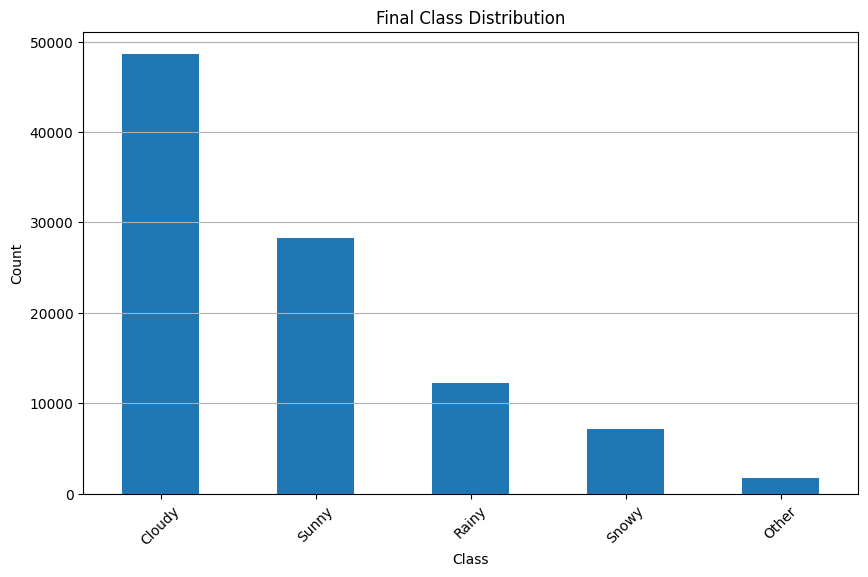

In [ ]:
import matplotlib.pyplot as plt

# Plot the class counts
class_counts = df['Broad Condition'].value_counts()
class_counts.plot(kind='bar', figsize=(10, 6), title='Final Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


In [ ]:
# Check unique Broad Condition classes and their counts
broad_condition_counts = df['Broad Condition'].value_counts()

# Display the unique classes and their counts
print("Broad Condition Classes and Their Counts:\n")
for condition, count in broad_condition_counts.items():
    print(f"{condition}: {count}")

# Optionally, display the total number of unique classes
total_broad_classes = len(broad_condition_counts)
print(f"\nTotal Number of Broad Classes: {total_broad_classes}")


Broad Condition Classes and Their Counts:

Cloudy: 48639
Sunny: 28270
Rainy: 12233
Snowy: 7209
Other: 1730

Total Number of Broad Classes: 5


In [ ]:
output_file_path = '/content/drive/MyDrive/semester_4/intro_to_embedded_DL/Project/processed_wunderground.csv'

# Save the DataFrame to the CSV file
df.to_csv(output_file_path, index=False)

print(f"DataFrame has been saved to {output_file_path}")


DataFrame has been saved to /content/drive/MyDrive/semester_4/intro_to_embedded_DL/Project/processed_wunderground.csv


# WEATHER FORECASTING MODEL


In [1]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Verify that the drive is mounted
!ls /content/drive

# ============================================
# 1. Import Necessary Libraries
# ============================================

import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import mean_absolute_error, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
import tensorflow as tf

# ============================================
# 2. Load and Preprocess Data
# ============================================

data_path = '/content/drive/MyDrive/semester_4/intro_to_embedded_DL/Project/processed_wunderground.csv'
df = pd.read_csv(data_path, sep=",")

# One-Hot Encode Categorical Data
encoder = OneHotEncoder(sparse_output=False)
encoded_conditions = encoder.fit_transform(df[['Broad Condition']])

# Scale Numerical Data
numerical_columns = ['Temperature (C)', 'Pressure (hPa)']
scaler = MinMaxScaler()
scaled_numericals = scaler.fit_transform(df[numerical_columns])

# Combine scaled numericals and encoded conditions
processed_data = np.hstack([scaled_numericals, encoded_conditions])

# Create Sequences for Supervised Learning
def create_sequences(data, past_days=30):
    X, y = [], []
    for i in range(len(data) - past_days):
        X.append(data[i:i + past_days])
        y.append(data[i + past_days])
    return np.array(X), np.array(y)

past_days = 30
X, y = create_sequences(processed_data, past_days=past_days)

# Split Data Chronologically
num_features = len(numerical_columns)
num_categories = encoded_conditions.shape[1]

train_size = int(0.7 * len(X))
val_size = int(0.1 * len(X))

X_train, X_val, X_test = X[:train_size], X[train_size:train_size + val_size], X[train_size + val_size:]
y_train, y_val, y_test = y[:train_size], y[train_size:train_size + val_size], y[train_size + val_size:]

# Reshape input data for FFNN
X_train_ffnn = X_train.reshape(X_train.shape[0], -1)
X_val_ffnn = X_val.reshape(X_val.shape[0], -1)
X_test_ffnn = X_test.reshape(X_test.shape[0], -1)

# ============================================
# 3. Build the Feedforward Neural Network (FFNN) Model
# ============================================

ffnn_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_ffnn.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(num_features + num_categories, activation=None)  # Final layer for numerical + categorical outputs
])

# Custom Loss Function
def custom_loss(y_true, y_pred):
    # Split true and predicted outputs
    y_true_num = y_true[:, :num_features]
    y_pred_num = y_pred[:, :num_features]
    y_true_cat = y_true[:, num_features:]
    y_pred_cat = y_pred[:, num_features:]

    # MSE for numerical features
    loss_num = tf.keras.losses.MeanSquaredError()(y_true_num, y_pred_num)

    # Categorical Cross-Entropy for categorical features
    loss_cat = tf.keras.losses.CategoricalCrossentropy(from_logits=True)(y_true_cat, y_pred_cat)

    # Combine losses (can use weighting if necessary)
    return loss_num + loss_cat

ffnn_model.compile(optimizer=Adam(0.001), loss=custom_loss)
ffnn_model.summary()

# ============================================
# 4. Add Checkpointing with Correct Extension
# ============================================

checkpoint_path = "/content/drive/MyDrive/semester_4/intro_to_embedded_DL/Project/checkpoints/ffnn_model_checkpoint.keras"
checkpoint = ModelCheckpoint(checkpoint_path, monitor='val_loss', verbose=1, save_best_only=True, mode='min')

# ============================================
# 5. Train the FFNN Model with Checkpointing
# ============================================

callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6),
    checkpoint
]

history = ffnn_model.fit(
    X_train_ffnn, y_train,
    validation_data=(X_val_ffnn, y_val),
    epochs=100,
    batch_size=32,
    callbacks=callbacks,
    verbose=1
)

# ============================================
# 6. Evaluate the FFNN Model
# ============================================

test_loss = ffnn_model.evaluate(X_test_ffnn, y_test, verbose=0)
print(f"Test Loss: {test_loss:.4f}")

# ============================================
# 7. Predict Next Day Features and Conditions
# ============================================

last_test_sequence_ffnn = X_test_ffnn[-1].reshape(1, -1)
predicted_scaled = ffnn_model.predict(last_test_sequence_ffnn)

# Inverse transform predictions
predicted_numericals = scaler.inverse_transform(predicted_scaled[:, :num_features])
predicted_conditions = encoder.inverse_transform(tf.nn.softmax(predicted_scaled[:, num_features:]).numpy())

# Retrieve actual values
actual_scaled = y_test[-1].reshape(1, -1)
actual_numericals = scaler.inverse_transform(actual_scaled[:, :num_features])
actual_conditions = encoder.inverse_transform(actual_scaled[:, num_features:])

print("Predicted Next Day's Weather Features:")
print(f"  Temperature: {predicted_numericals[0][0]:.2f} C")
print(f"  Pressure:    {predicted_numericals[0][1]:.2f} hPa")
print(f"  Condition:   {predicted_conditions[0]}")

print("\nActual Next Day's Weather Features:")
print(f"  Temperature: {actual_numericals[0][0]:.2f} C")
print(f"  Pressure:    {actual_numericals[0][1]:.2f} hPa")
print(f"  Condition:   {actual_conditions[0]}")

# ============================================
# 8. Calculate Additional Metrics (MAE and Accuracy)
# ============================================

# Predict on the entire test set
predicted_scaled_test = ffnn_model.predict(X_test_ffnn)

# Inverse transform numerical predictions
predicted_numericals_test = scaler.inverse_transform(predicted_scaled_test[:, :num_features])
actual_numericals_test = scaler.inverse_transform(y_test[:, :num_features])

# Inverse transform categorical predictions
predicted_conditions_prob = tf.nn.softmax(predicted_scaled_test[:, num_features:]).numpy()
predicted_conditions_test = encoder.inverse_transform(predicted_conditions_prob)

# Calculate MAE for numerical features
mae_temperature = mean_absolute_error(actual_numericals_test[:, 0], predicted_numericals_test[:, 0])
mae_pressure = mean_absolute_error(actual_numericals_test[:, 1], predicted_numericals_test[:, 1])

# Calculate Accuracy for categorical feature
actual_conditions_test = encoder.inverse_transform(y_test[:, num_features:])
accuracy_condition = accuracy_score(
    np.argmax(predicted_conditions_prob, axis=1),
    np.argmax(y_test[:, num_features:], axis=1)
)

# Print the metrics
print("\n=== Additional Metrics on Test Set ===")
print(f"Mean Absolute Error (Temperature): {mae_temperature:.2f} C")
print(f"Mean Absolute Error (Pressure): {mae_pressure:.2f} hPa")
print(f"Accuracy (Broad Condition): {accuracy_condition * 100:.2f}%")


Mounted at /content/drive
MyDrive  Shareddrives


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │          27,008 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 7)                   │             231 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 37,575 (146.78 KB)

 Trainable params: 37,575 (146.78 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
2145/2145 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8359
Epoch 1: val_loss improved from inf to 0.59029, saving model to /content/drive/MyDrive/semester_4/intro_to_embedded_DL/Project/checkpoints/ffnn_model_checkpoint.keras
2145/2145 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - loss: 0.8359 - val_loss: 0.5903 - learning_rate: 0.0010
Epoch 2/100
2140/2145 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6207
Epoch 2: val_loss did not improve from 0.59029
2145/2145 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.6206 - val_loss: 0.6070 - learning_rate: 0.0010
Epoch 3/100
2145/2145 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6101
Epoch 3: val_loss improved from 0.59029 to 0.58285, saving model to /content/drive/MyDrive/semester_4/intro_to_embedded_DL/Project/checkpoints/ffnn_model_checkpoint.keras
2145/2145 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.6101 - val_loss: 0.5829 - learning_rate: 0.0010
Epoch 4/100
2133/2145 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5992
Epoch 4: val_loss did not impro

In [1]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Verify that the drive is mounted
!ls /content/drive

# ============================================
# 1. Import Necessary Libraries
# ============================================

import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import mean_absolute_error, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
import tensorflow as tf

# ============================================
# 2. Load and Preprocess Data
# ============================================

data_path = '/content/drive/MyDrive/semester_4/intro_to_embedded_DL/Project/processed_wunderground.csv'
df = pd.read_csv(data_path, sep=",")

# One-Hot Encode Categorical Data
encoder = OneHotEncoder(sparse_output=False)
encoded_conditions = encoder.fit_transform(df[['Broad Condition']])

# Scale Numerical Data
numerical_columns = ['Temperature (C)', 'Pressure (hPa)']
scaler = MinMaxScaler()
scaled_numericals = scaler.fit_transform(df[numerical_columns])

# Combine scaled numericals and encoded conditions
processed_data = np.hstack([scaled_numericals, encoded_conditions])

# Create Sequences for Supervised Learning
def create_sequences(data, past_days=30):
    X, y = [], []
    for i in range(len(data) - past_days):
        X.append(data[i:i + past_days])
        y.append(data[i + past_days])
    return np.array(X), np.array(y)

past_days = 30
X, y = create_sequences(processed_data, past_days=past_days)

# Split Data Chronologically
num_features = len(numerical_columns)
num_categories = encoded_conditions.shape[1]

train_size = int(0.7 * len(X))
val_size = int(0.1 * len(X))

X_train, X_val, X_test = X[:train_size], X[train_size:train_size + val_size], X[train_size + val_size:]
y_train, y_val, y_test = y[:train_size], y[train_size:train_size + val_size], y[train_size + val_size:]

# Reshape input data for FFNN
X_train_ffnn = X_train.reshape(X_train.shape[0], -1)
X_val_ffnn = X_val.reshape(X_val.shape[0], -1)
X_test_ffnn = X_test.reshape(X_test.shape[0], -1)

# ============================================
# 3. Build the Feedforward Neural Network (FFNN) Model
# ============================================

ffnn_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_ffnn.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(num_features + num_categories, activation=None)  # Final layer for numerical + categorical outputs
])

# Custom Loss Function
def custom_loss(y_true, y_pred):
    # Split true and predicted outputs
    y_true_num = y_true[:, :num_features]
    y_pred_num = y_pred[:, :num_features]
    y_true_cat = y_true[:, num_features:]
    y_pred_cat = y_pred[:, num_features:]

    # MSE for numerical features
    loss_num = tf.keras.losses.MeanSquaredError()(y_true_num, y_pred_num)

    # Categorical Cross-Entropy for categorical features
    loss_cat = tf.keras.losses.CategoricalCrossentropy(from_logits=True)(y_true_cat, y_pred_cat)

    # Combine losses (can use weighting if necessary)
    return loss_num + loss_cat

ffnn_model.compile(optimizer=Adam(0.001), loss=custom_loss)
ffnn_model.summary()

Mounted at /content/drive
MyDrive  Shareddrives


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │          27,008 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 7)                   │             231 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 37,575 (146.78 KB)

 Trainable params: 37,575 (146.78 KB)

 Non-trainable params: 0 (0.00 B)

In [4]:
from tensorflow.keras.models import load_model
import tensorflow as tf
from tensorflow.keras.losses import MeanSquaredError, CategoricalCrossentropy

# Register the custom loss function
@tf.keras.utils.register_keras_serializable()
def custom_loss(y_true, y_pred):
    # Split true and predicted outputs
    y_true_num = y_true[:, :num_features]
    y_pred_num = y_pred[:, :num_features]
    y_true_cat = y_true[:, num_features:]
    y_pred_cat = y_pred[:, num_features:]

    # MSE for numerical features
    loss_num = MeanSquaredError()(y_true_num, y_pred_num)

    # Categorical Cross-Entropy for categorical features
    loss_cat = CategoricalCrossentropy(from_logits=True)(y_true_cat, y_pred_cat)

    # Combine losses (can use weighting if necessary)
    return loss_num + loss_cat

# Path to the saved checkpoint
checkpoint_path = "/content/drive/MyDrive/semester_4/intro_to_embedded_DL/Project/checkpoints/ffnn_model_checkpoint.keras"

# Load the model from the checkpoint
loaded_model = load_model(checkpoint_path, custom_objects={"custom_loss": custom_loss})

# Summarize the loaded model
loaded_model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │          27,008 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 7)                   │             231 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 112,727 (440.34 KB)

 Trainable params: 37,575 (146.78 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 75,152 (293.57 KB)

In [5]:
converter = tf.lite.TFLiteConverter.from_keras_model(loaded_model)
tflite_model = converter.convert()


open("/content/tflite_model.tflite","wb").write(tflite_model)

Saved artifact at '/tmp/tmp2leo7o79'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 210), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 7), dtype=tf.float32, name=None)
Captures:
  138603744609904: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138603744614128: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138603744623984: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138603744623104: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138603742748640: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138603742745472: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138603742753040: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138603742753568: TensorSpec(shape=(), dtype=tf.resource, name=None)


152536